# Otsu thresholding

## Understanding

http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html#:~:text=Otsu's%20thresholding%20method%20involves%20iterating,fall%20in%20foreground%20or%20background.


- Example

<img src='./image/otsu_example.png'>
<br>

- Table depending on threshold

<img src='./image/otsu_threshold_table.png' width = "800">
<br>

- Within Class Variance and Between Class Variance
<br>
<img src='./image/otsu_variance_formula.png'><br>
<img src='./image/otsu_variance_table.png' width = "800">
<br>


image source: https://pixabay.com/ <br>
code source: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

(1024, 1280)


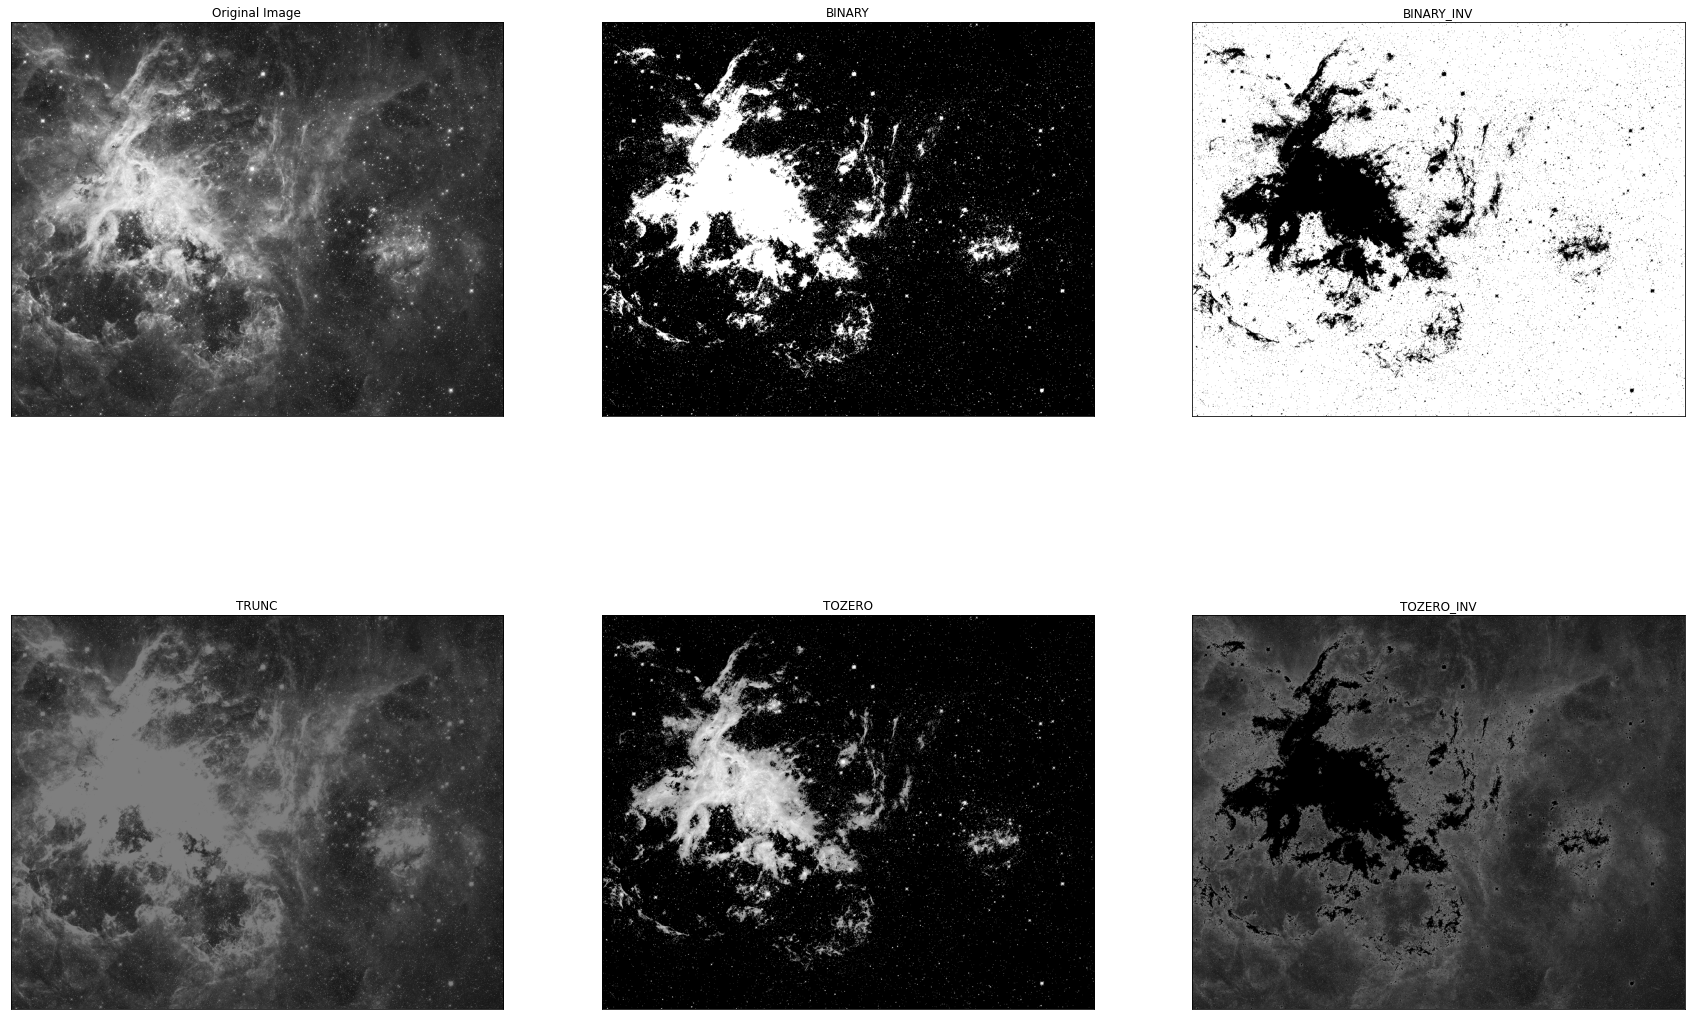

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


current_dir = '/home/yshwang/algorithm/image_processing'
img = cv2.imread(current_dir + '/image/milky-way-g347b5618f_1280.jpg', 0)

print(img.shape)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(30, 20))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

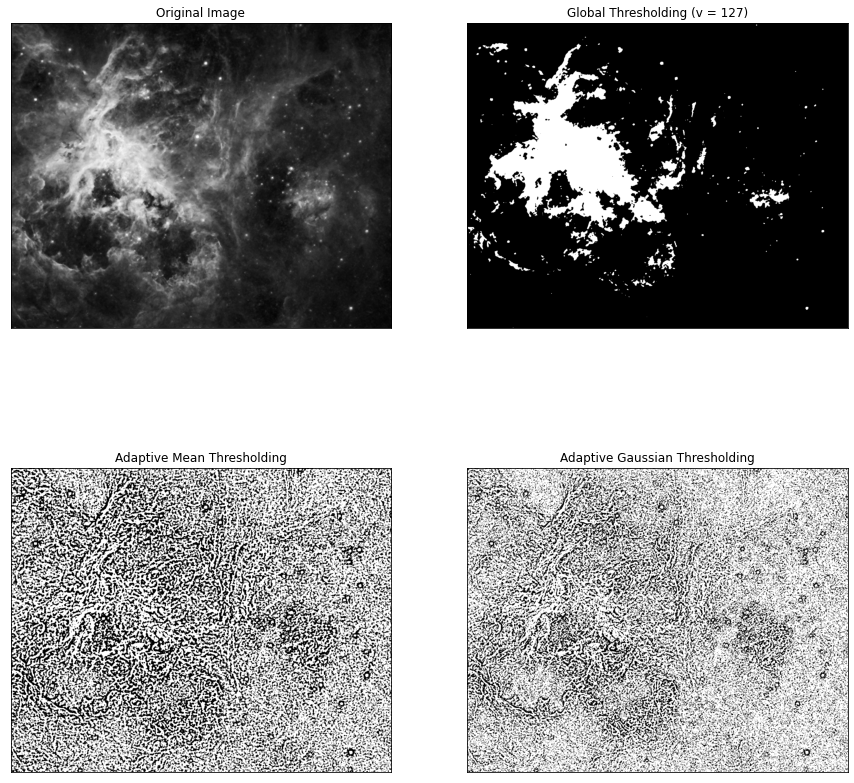

In [24]:
img_ = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img_,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_, th1, th2, th3]

plt.figure(figsize=(15, 15))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

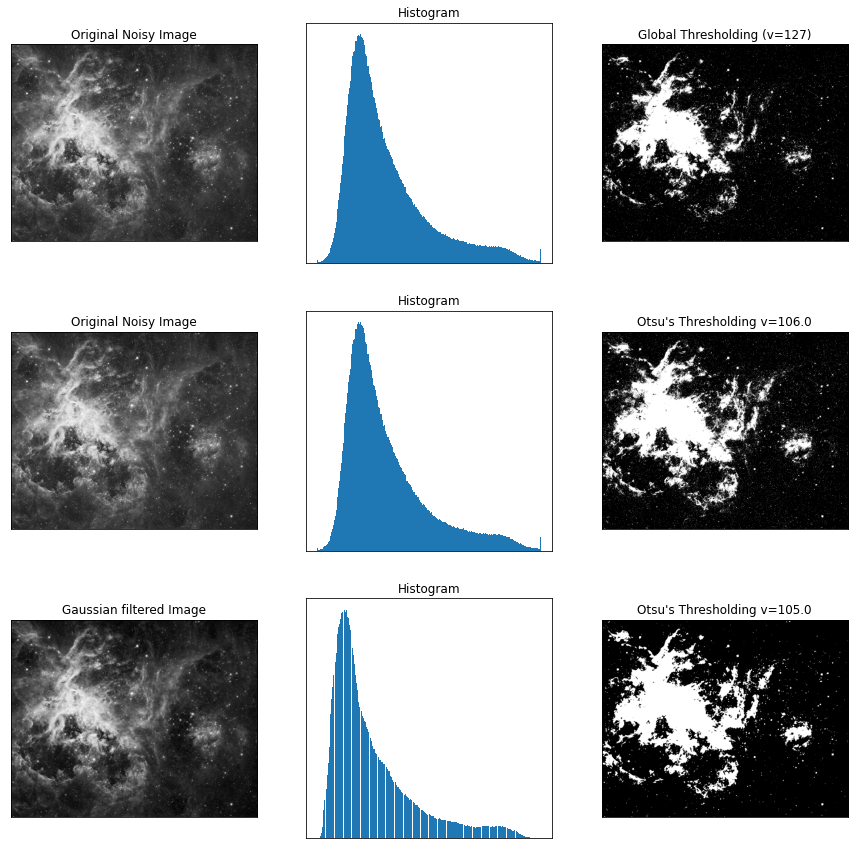

In [33]:


# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',f"Otsu's Thresholding v={ret2}",
          'Gaussian filtered Image','Histogram',f"Otsu's Thresholding v={ret3}"]

plt.figure(figsize=(15, 15))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

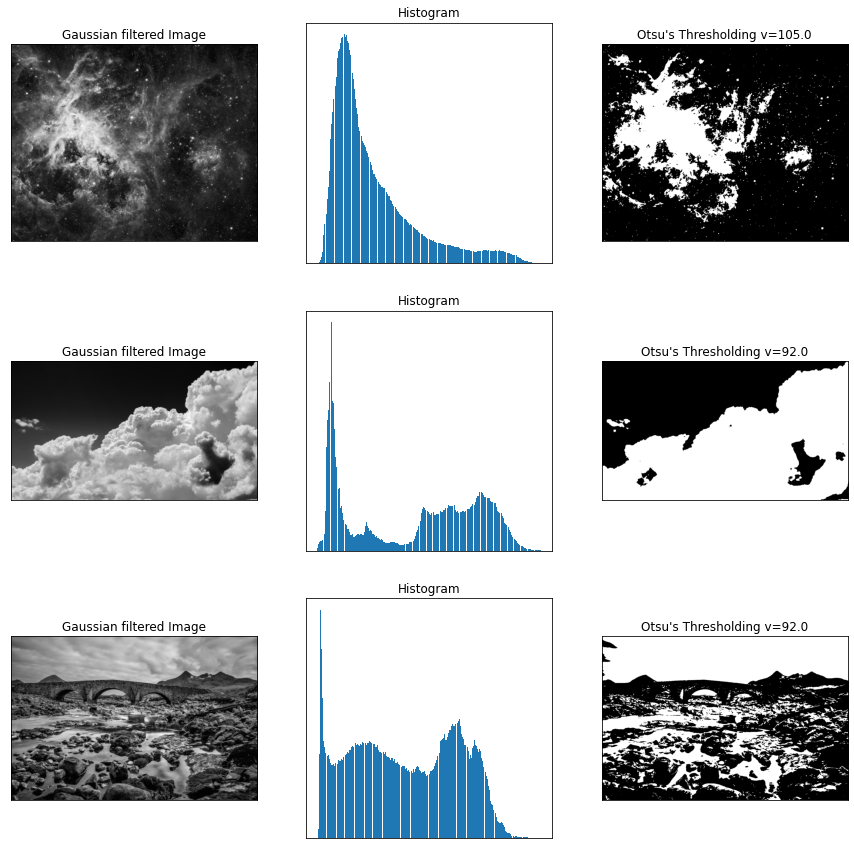

In [41]:
img2 = cv2.imread(current_dir + '/image/clouds-g8f050a62a_1280.jpg', 0)
img3 = cv2.imread(current_dir + '/image/bridge-ge46e5c4e8_1280.jpg', 0)

blur2 = cv2.GaussianBlur(img2,(5,5),0)
blur3 = cv2.GaussianBlur(img3,(5,5),0)
ret32,th32 = cv2.threshold(blur2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret33,th33 = cv2.threshold(blur3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(15, 15))

images = [blur, 0, th3,
        blur2, 0, th32, 
        blur3, 0, th33]
titles = ['Gaussian filtered Image','Histogram',f"Otsu's Thresholding v={ret3}", \
        'Gaussian filtered Image','Histogram',f"Otsu's Thresholding v={ret32}", \
        'Gaussian filtered Image','Histogram',f"Otsu's Thresholding v={ret32}"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()